In [34]:
import datetime
import numpy as np
import seaborn as sns
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import  layers, models
from sklearn.preprocessing import OneHotEncoder 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from sklearn.neural_network import MLPClassifier
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [3]:
print(tf.__version__)

2.11.0


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.cifar10.load_data()

In [6]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
print(f"x_train shape: {X_train.shape} \ny_train shape: {Y_train.shape}")
print(f"x_test shape: {X_test.shape} \ny_test shape: {Y_test.shape}")

x_train shape: (50000, 32, 32, 3) 
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) 
y_test shape: (10000, 1)


In [8]:
X_train= X_train/255
X_test= X_test/255

In [9]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_train=Y_train.ravel()
y_test=Y_test.ravel()

In [11]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [12]:
# X_train

In [13]:
print("x_train range ",np.amin(X_train), " to ",np.amax(X_train))

x_train range  0.0  to  1.0


c:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Classes')

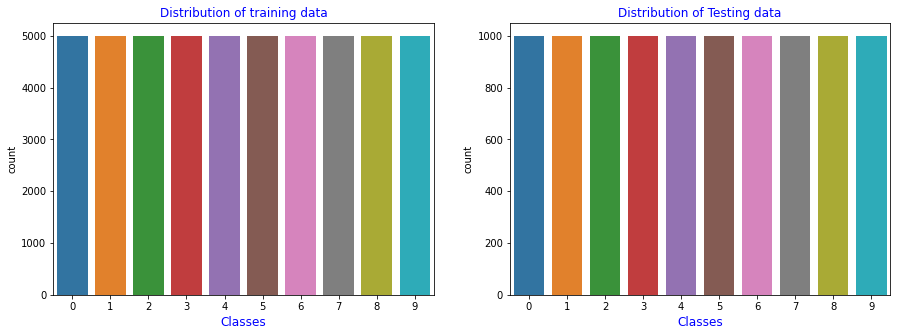

In [17]:
fig,axis = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y_train,ax=axis[0])
sns.countplot(y_test,ax=axis[1])
axis[0].set_title('Distribution of training data',{'fontsize':12,'color':'blue'})
axis[1].set_title('Distribution of Testing data',{'fontsize':12,'color':'blue'})
axis[0].set_xlabel('Classes',{'fontsize':12,'color':'blue'})
axis[1].set_xlabel('Classes',{'fontsize':12,'color':'blue'})

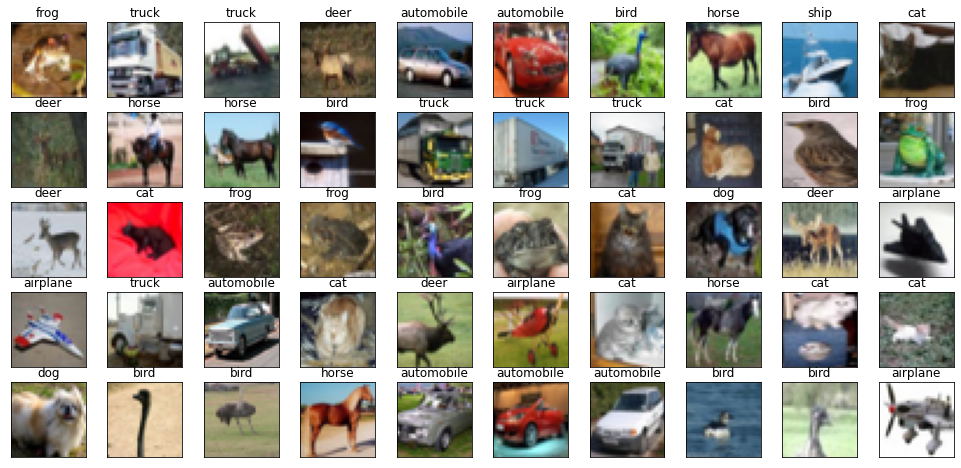

In [18]:
figure, axes = plt.subplots(ncols=10, nrows=5, figsize=(17, 8))
index = 0
for i in range(5):
    for j in range(10):
        axes[i,j].set_title(labels[Y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

Reshaping the training data
50000 32 32 3 to 32*32*3 3072

In [19]:
a,b,c,d=X_train.shape
x_train=X_train.reshape((a,b*c*d))
a,b,c,d=X_test.shape
x_test=X_test.reshape((a,b*c*d))

print(f"x_train shape: {x_train.shape} \ny_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} \ny_test shape: {y_test.shape}")

x_train shape: (50000, 3072) 
y_train shape: (50000,)
x_test shape: (10000, 3072) 
y_test shape: (10000,)


### Feature Reduction

In [20]:
# Apply PCA for feature extraction.
t0 = datetime.datetime.now()

pca = PCA(n_components=40)
pca.fit(x_train, y_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

to = datetime.datetime.now() - t0
print('PCA runtime:', to)

PCA runtime: 0:00:23.156005


In [21]:
print(f"x_train shape: {x_train_pca.shape} \ny_train shape: {y_train.shape}")
print(f"x_test shape: {x_test_pca.shape} \ny_test shape: {y_test.shape}")

x_train shape: (50000, 40) 
y_train shape: (50000,)
x_test shape: (10000, 40) 
y_test shape: (10000,)


# KNN

In [22]:
### Construct KNN model employment.
clf = KNeighborsClassifier(n_neighbors=16,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto'
                           )     

In [23]:
# execute the 10-fold cross validation exercise in training dataset.
t0 = datetime.datetime.now()

CV_accuracy_score = cross_val_score(clf, x_train_pca, y_train, cv=10, scoring = 'accuracy')
CV_precision_score = cross_val_score(clf,x_train_pca, y_train, cv=10, scoring = 'precision_macro')
CV_recall_score = cross_val_score(clf, x_train_pca, y_train, cv=10, scoring = 'recall_macro')
CV_f1_score = cross_val_score(clf, x_train_pca, y_train, cv=10, scoring = 'f1_macro')
average_accuracy = np.mean(CV_accuracy_score)
average_precision = np.mean(CV_precision_score)
average_recall = np.mean(CV_recall_score)
average_f1 = np.mean(CV_f1_score)

to = datetime.datetime.now() - t0
print('KNN runtime:', to)

KNN runtime: 0:00:14.005270


In [24]:
print('average_accuracy:', average_accuracy)
print('average_precision:', average_precision)
print('average_recall:', average_recall)
print('average_f1:', average_f1)

average_accuracy: 0.41234000000000004
average_precision: 0.4557563225086305
average_recall: 0.41233999999999993
average_f1: 0.40719094694614394


### Predict test set

In [25]:
# output the test data prediction result.
t0 = datetime.datetime.now() 

clf = clf.fit(x_train_pca, y_train)
knn_pred = clf.predict(x_test_pca)

to = datetime.datetime.now() - t0
print('test runtime:', to)

test runtime: 0:00:00.696993


In [26]:
print("Accuracy for KNN {} %".format(accuracy_score(y_test, knn_pred)*100))

Accuracy for KNN 42.68 %


### Heatmap of Confusion Matrix

In [27]:
cm_knn=confusion_matrix(y_test,knn_pred)
print(cm_knn)

[[573  16  93   8  40   5  48  20 181  16]
 [ 60 336  49  25  84  16 140  17 190  83]
 [ 94   8 401  37 219  31 139  20  42   9]
 [ 41  18 132 174 147 116 259  41  45  27]
 [ 51   5 192  24 506   7 144  30  39   2]
 [ 27  13 153  94 150 291 171  46  45  10]
 [  8   3 141  27 175  18 589  12  18   9]
 [ 55  19  91  37 203  52 113 344  51  35]
 [112  23  31  26  46  12  30  11 684  25]
 [ 91  69  34  23  57  25 103  37 191 370]]


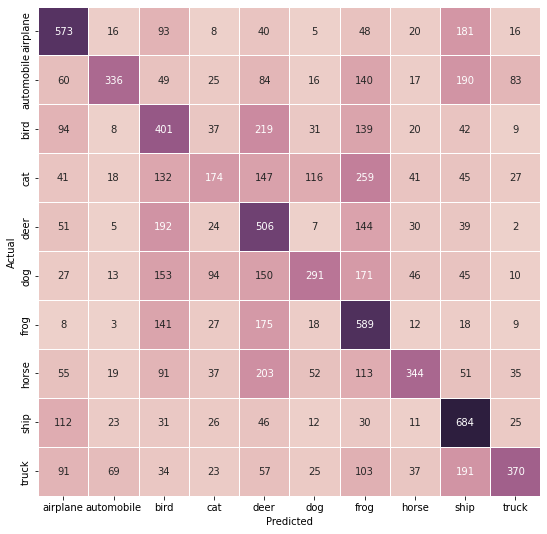

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_knn, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classification Report

In [29]:
print(classification_report(y_test,knn_pred,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.52      0.57      0.54      1000
  automobile       0.66      0.34      0.45      1000
        bird       0.30      0.40      0.35      1000
         cat       0.37      0.17      0.24      1000
        deer       0.31      0.51      0.39      1000
         dog       0.51      0.29      0.37      1000
        frog       0.34      0.59      0.43      1000
       horse       0.60      0.34      0.44      1000
        ship       0.46      0.68      0.55      1000
       truck       0.63      0.37      0.47      1000

    accuracy                           0.43     10000
   macro avg       0.47      0.43      0.42     10000
weighted avg       0.47      0.43      0.42     10000



In [88]:
pickle.dump(clf,open('model_knn.pkl','wb'))
knn_pkl = pickle.load(open('model_knn.pkl','rb'))
knn_pkl.predict(x_test_pca)

array([4, 8, 8, ..., 5, 6, 7], dtype=uint8)

# KNN WITH GRID SEARCH

In [30]:
# knn=KNeighborsClassifier()
# grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
#                'weights' : ['uniform','distance'],
#                'metric' : ['minkowski','euclidean','manhattan']}
# y_train = y_train.ravel()
# gs=GridSearchCV(knn,param_grid=grid_params)

# t0 = datetime.datetime.now()
# gs.fit(x_train,y_train)
# pred_gs=gs.predict(x_test)

# to = datetime.datetime.now() - t0
# print('test runtime:', to)

In [31]:
# cm_knn_gs=confusion_matrix(y_test,knn_pred)
# print(cm_knn_gs)

In [32]:
# plt.figure(figsize=(9,9))
# sns.heatmap(cm_knn_gs, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# DECISION TREE

In [33]:
dt=DecisionTreeClassifier()
dt.fit(x_train_pca,y_train)

DecisionTreeClassifier()

In [34]:
pred_dt=dt.predict(x_test_pca)

In [35]:
print("Accuracy for Decision Tree {} %".format(accuracy_score(y_test, pred_dt)*100))

Accuracy for Decision Tree 27.689999999999998 %


In [36]:
cm_dt=confusion_matrix(y_test,knn_pred)
# print(cm_dt)

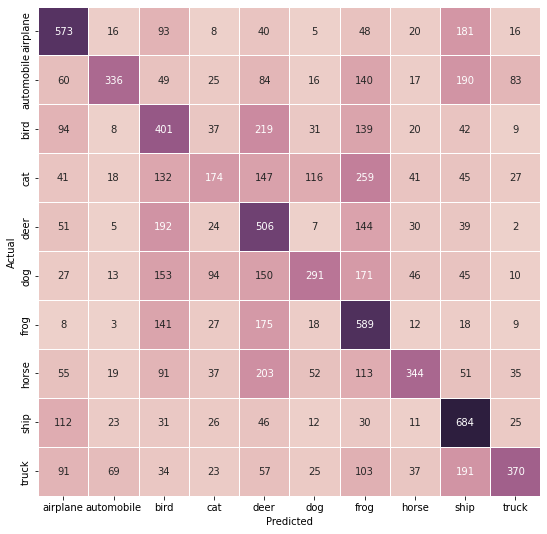

In [37]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_dt, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classification Report

In [38]:
print(classification_report(y_test,pred_dt,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.36      0.37      0.36      1000
  automobile       0.32      0.29      0.30      1000
        bird       0.23      0.24      0.24      1000
         cat       0.20      0.19      0.19      1000
        deer       0.21      0.22      0.22      1000
         dog       0.24      0.23      0.24      1000
        frog       0.27      0.28      0.27      1000
       horse       0.29      0.27      0.28      1000
        ship       0.36      0.38      0.37      1000
       truck       0.30      0.30      0.30      1000

    accuracy                           0.28     10000
   macro avg       0.28      0.28      0.28     10000
weighted avg       0.28      0.28      0.28     10000



In [95]:
pickle.dump(dt,open('model_dt.pkl','wb'))
dt_pkl = pickle.load(open('model_dt.pkl','rb'))
dt_pkl.predict(x_test_pca)

array([0, 9, 9, ..., 4, 5, 7], dtype=uint8)

# RANDOMM FOREST

In [39]:
rf=RandomForestClassifier(n_estimators=1500)
rf.fit(x_train_pca, y_train)

RandomForestClassifier(n_estimators=1500)

In [40]:
pred_rf=rf.predict(x_test_pca)

In [41]:
print("Accuracy for Random Forest {} %".format(accuracy_score(y_test, pred_rf)*100))

Accuracy for Random Forest 49.63 %


In [42]:
cm_rf=confusion_matrix(y_test,pred_rf)
# print(cm_dt)

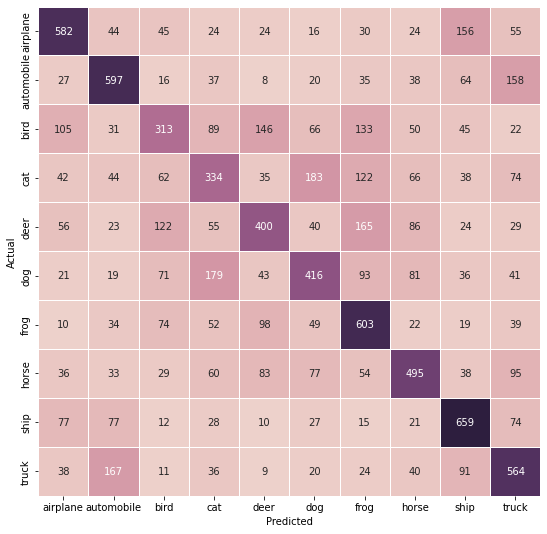

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_rf, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Classification Report

In [44]:
print(classification_report(y_test,pred_dt,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.36      0.37      0.36      1000
  automobile       0.32      0.29      0.30      1000
        bird       0.23      0.24      0.24      1000
         cat       0.20      0.19      0.19      1000
        deer       0.21      0.22      0.22      1000
         dog       0.24      0.23      0.24      1000
        frog       0.27      0.28      0.27      1000
       horse       0.29      0.27      0.28      1000
        ship       0.36      0.38      0.37      1000
       truck       0.30      0.30      0.30      1000

    accuracy                           0.28     10000
   macro avg       0.28      0.28      0.28     10000
weighted avg       0.28      0.28      0.28     10000



In [96]:
pickle.dump(dt,open('model_rf.pkl','wb'))
rf_pkl = pickle.load(open('model_rf.pkl','rb'))
rf_pkl.predict(x_test_pca)

array([0, 9, 9, ..., 4, 5, 7], dtype=uint8)

# ANN

In [50]:
ann = models.Sequential([layers.Flatten(input_shape=(32,32,3)),layers.Dense(3000,activation='relu'),layers.Dense(1000,activation='sigmoid')])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 115s 73ms/step - loss: 1.9387 - accuracy: 0.3205
Epoch 2/50
1563/1563 [==============================] - 113s 72ms/step - loss: 1.7032 - accuracy: 0.4010
Epoch 3/50
1563/1563 [==============================] - 114s 73ms/step - loss: 1.6153 - accuracy: 0.4336
Epoch 4/50
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5563 - accuracy: 0.4543
Epoch 5/50
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5096 - accuracy: 0.4701
Epoch 6/50
1563/1563 [==============================] - 119s 76ms/step - loss: 1.4716 - accuracy: 0.4856
Epoch 7/50
1563/1563 [==============================] - 128s 82ms/step - loss: 1.4361 - accuracy: 0.4980
Epoch 8/50
1563/1563 [==============================] - 128s 82ms/step - loss: 1.4050 - accuracy: 0.5107
Epoch 9/50
1563/1563 [==============================] - 130s 83ms/step - loss: 1.3778 - accuracy: 0.5200
Epoch 10/50
1563/1563 [==============================] 

In [54]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_5 (Dense)             (None, 1000)              3001000   
                                                                 
Total params: 12,220,000
Trainable params: 12,220,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred_ann=ann.predict(X_test)

In [16]:
# import pickle
# with open('model.pickle', 'wb') as f:
#     pickle.dump(r,f)


In [98]:
# ann.save('ann.h5') 

In [ ]:
cm_ann=confusion_matrix(y_test,pred_ann)
# print(cm_dt)
plt.figure(figsize=(9,9))
sns.heatmap(cm_ann, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test,pred_dt,target_names=labels))

# CNN

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [21]:
y_train, y_test = Y_train.flatten(), Y_test.flatten()

In [22]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [23]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [24]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [36]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
# model.summary()


number of classes: 10


In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0   

In [38]:
model.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics = ['accuracy'])

<img src="cnn.gif" width="800" height="400" />


In [43]:
history = model.fit(X_train, y_train, epochs = 50 ,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 336s 215ms/step - loss: 1.1388 - accuracy: 0.5958 - val_loss: 0.8968 - val_accuracy: 0.6911
Epoch 2/50
1563/1563 [==============================] - ETA: 0s - loss: 0.8199 - accuracy: 0.7156

In [ ]:
plt.figure
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

#Accuracy
plt.plot(history.epoch,history.history['acc'],label="Training Accuracy")
plt.plot(history.epoch,history.history['val_acc'],label="Validation Accuracy")
plt.scatter(history.epoch,history.history['acc'],marker='*')
plt.scatter(history.epoch,history.history['val_acc'])
plt.legend(loc='best')

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('CNN Epoch and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#Loss
plt.plot(history.epoch,history.history['loss'],label="Training Loss")
plt.plot(history.epoch,history.history['val_loss'],label="Validation Loss")
plt.scatter(history.epoch,history.history['loss'],marker='*')
plt.scatter(history.epoch,history.history['val_loss'])
plt.legend(loc='best')

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('CNN Epoch and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# predictions = cnn_model.predict(X_test)
# predictions = one_hot_encoder.inverse_transform(predictions)

# y_test = one_hot_encoder.inverse_transform(y_test)


evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

predicted_classes = cnn_model.predict_classes(X_test) 

In [ ]:
L = 10
W = 10
fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    